# 서담프로젝트 화이팅 : >

In [9]:
import pickle

with open('./data/idx_total.pkl','rb') as f:
    idx_total = pickle.load(f)
with open('./data_l/bow_mat.pkl','rb') as f:
    cfd = pickle.load(f)

In [10]:
# key와 value 위치 바꾸기

idx = dict([(value, key) for key, value in idx_total.items()])
idx

{0: '한해',
 1: '성지',
 2: '추천',
 3: '내',
 4: '살',
 5: '인생',
 6: '가장',
 7: '날로',
 8: '니',
 9: '승자',
 10: '해',
 11: '일만',
 12: '선택',
 13: '기도',
 14: '진짜',
 15: '아아',
 16: '올해',
 17: '학점',
 18: '취업',
 19: '로또',
 20: '자정',
 21: '생각',
 22: '웰케',
 23: '해피',
 24: '뉴',
 25: '운',
 26: '빠',
 27: '합격',
 28: '하자',
 29: '해피뉴이어',
 30: '모든',
 31: '땡',
 32: '빠다',
 33: '내년',
 34: '도전',
 35: '새해',
 36: '복',
 37: '예비',
 38: '회계사',
 39: '실패',
 40: '내꼬',
 41: '제바',
 42: '번',
 43: '불교',
 44: '방송',
 45: '카운트',
 46: '다운',
 47: '곳',
 48: '나야',
 49: '후회',
 50: '형',
 51: '이제',
 52: '학년',
 53: '실화',
 54: '플랜카드',
 55: '댓글',
 56: '힘',
 57: '외무고시',
 58: '포함',
 59: '영감',
 60: '축하',
 61: '행시',
 62: '해주',
 63: '로스쿨',
 64: '제발',
 65: '공무원',
 66: '아멘',
 67: '도나',
 68: '위',
 69: '분',
 70: '비',
 71: '소원',
 72: '학회',
 73: '꼭꼭',
 74: '꼽',
 75: '사리',
 76: '씨파',
 77: '화이팅',
 78: '두',
 79: '행정고시',
 80: '펑',
 81: '카톡',
 82: '서버',
 83: '만난',
 84: '사람',
 85: '기억',
 86: '정신',
 87: '꼭',
 88: '담',
 89: '보',
 90: '동물',
 91: '숲',
 92: '카

In [3]:
cfd

array([[11.,  1., 29., ...,  0.,  0.,  0.],
       [ 0.,  0., 41., ...,  0.,  0.,  0.],
       [ 2.,  3., 42., ...,  0.,  0.,  0.],
       ...,
       [ 3.,  1., 69., ...,  0.,  0.,  0.],
       [ 1.,  3., 53., ...,  0.,  0.,  0.],
       [ 1.,  3., 54., ...,  1.,  2.,  1.]])

In [6]:
cfd.shape #181일 #79000여 키워드

(181, 79288)

In [2]:
import pickle
with open('./data/word30s.pkl', 'rb') as f :
    word30s = pickle.load(f)
    

In [3]:
word30s

,keyword,count,dates,words,correlated_words
0,결혼,11,"[19, 48, 57, 71, 114, 121, 125, 143, 146, 159,...","[(딩크, 0.7963616251945496), (비혼, 0.782546818256...","[비혼, 이혼, 출산, 연애, 가치관]"
1,수능,11,"[5, 8, 18, 24, 41, 58, 149, 154, 162, 164, 169]","[(국어, 0.8058297038078308), (영수, 0.746328294277...","[국어, 의치, 표점, 확통, 재수]"
2,메일,9,"[38, 45, 47, 54, 55, 56, 57, 59, 68]","[(답신, 0.7894617915153503), (이메일, 0.78556102514...","[답신, 이메일, 답장, 허가, 정각, 승인, 전송]"
3,주식,9,"[7, 8, 19, 28, 31, 42, 44, 91, 102]","[(현물, 0.8004265427589417), (단타, 0.783385813236...",[]
4,새내기,8,"[2, 61, 69, 77, 81, 106, 171, 178]","[(학번, 0.770134687423706), (고학, 0.7453324794769...","[학번, 고학, 신입생, 환회, 알때, 후배, 학교생활]"
5,수강,8,"[37, 38, 47, 54, 55, 56, 59, 60]","[(중회잼관, 0.785818338394165), (강의, 0.75996237993...","[강의, 드랍, 과목, 청강]"
6,병원,8,"[34, 49, 125, 129, 142, 157, 164, 179]","[(대학병원, 0.8543877601623535), (치과, 0.8237363100...",[]
7,휴학,7,"[21, 25, 37, 55, 58, 109, 150]","[(복학, 0.7896164655685425), (졸유, 0.761773288249...","[복학, 학기]"
8,게임,7,"[126, 133, 136, 137, 138, 139, 151]","[(겜, 0.7657085061073303), (게이머, 0.731672644615...","[갸르, 파이]"
9,공대,7,"[8, 55, 74, 89, 105, 122, 165]","[(자공, 0.815639317035675), (문과, 0.7726525068283...","[문과, 이공, 공대생, 대학원]"


In [5]:
L_keyword = []
for i in range(len(word30s)):
    if word30s.correlated_words.loc[i] == []:continue
    L_new = []
    L_new.append(word30s.keyword.loc[i])
    L_new = L_new+word30s.correlated_words.loc[i]
    L_keyword.append(L_new)
    
L_keyword

[['결혼', '비혼', '이혼', '출산', '연애', '가치관'],
 ['수능', '국어', '의치', '표점', '확통', '재수'],
 ['메일', '답신', '이메일', '답장', '허가', '정각', '승인', '전송'],
 ['새내기', '학번', '고학', '신입생', '환회', '알때', '후배', '학교생활'],
 ['수강', '강의', '드랍', '과목', '청강'],
 ['휴학', '복학', '학기'],
 ['게임', '갸르', '파이'],
 ['공대', '문과', '이공', '공대생', '대학원'],
 ['확', '진자', '무증상', '폐쇄', '룸메', '락다운', '방역'],
 ['외모', '키도', '성격', '매력', '연애', '이성', '평범', '이상형'],
 ['사건', '손정민'],
 ['프로', '틴', '인치'],
 ['로욜라', '도서관'],
 ['합격', '합격자', '행시'],
 ['중국', '중국인', '일본', '짱깨'],
 ['투표', '선거', '사전투표', '독려', '유권자', '선관위', '재보궐선거', '명부', '인증', '인증샷', '참여자'],
 ['폰', '핸드폰', '아이폰'],
 ['총장', '심종혁', '기풍', '예수회', '공약', '간담', '남양주', '대자보']]

# 일별 떡밥 키워드별 카운트 (중간 단계)

혹시 몰라서 남겨뒀음!

In [11]:
#키워드별 카운트
import pandas as pd
ct = pd.DataFrame(columns = ['keyword', 'count'])
keyword_list = L_keyword[0]
idx = 0

for i in keyword_list:
    keyword_index = idx_total[i]
    for j in cfd[:, keyword_index]:
        ct.loc[idx] = [i, j]
        idx += 1

In [12]:
ct

,keyword,count
0,결혼,5.0
1,결혼,8.0
2,결혼,21.0
3,결혼,47.0
4,결혼,4.0
...,...,...
1081,가치관,1.0
1082,가치관,3.0
1083,가치관,0.0
1084,가치관,1.0


# 일별 떡밥 키워드군 카운트: what you want

In [13]:
def KeywordCount(떡밥리스트):
    import pandas as pd
    bob_count = pd.DataFrame(columns = ['group', 'count'])
    group = 떡밥리스트
    idx_name = group[0] #떡밥키워드군의 0번째 단어를 해당 떡밥키워드군 전체를 대표&지칭
    
    for groupword in group:
        idx = 0
        word_idx = idx_total[groupword]
        for j in cfd[:, word_idx]:
            if groupword == group[0]: #그룹 내 첫번째 단어이면, 새로 정의
                bob_count.loc[idx] = [idx_name, j]
            else:
                bob_count.iloc[idx,1] += j 
            idx += 1
    return bob_count #일별 떡밥 키워드군 카운드 데이터프레임

In [54]:
# TEST
A = ['학점','취업','추천','학년']
B = ['중국','자장면','국수','한국','생각']
df_A = KeywordCount(A)
df_B = KeywordCount(B)
display(df_A)
display(df_B)

,group,count
0,학점,107.0
1,학점,161.0
2,학점,152.0
3,학점,214.0
4,학점,140.0
...,...,...
176,학점,88.0
177,학점,171.0
178,학점,323.0
179,학점,202.0


,group,count
0,중국,81.0
1,중국,292.0
2,중국,209.0
3,중국,168.0
4,중국,196.0
...,...,...
176,중국,108.0
177,중국,229.0
178,중국,319.0
179,중국,194.0


# Trend line plot 

In [14]:
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm

fl = fm.FontProperties(fname='./data/NanumGothic.ttf').get_name()
plt.rc('font', family=fl)
plt.rc("axes", unicode_minus=False) #마이너스 부호 표시

In [15]:
colors = pd.read_csv('./data/lineplot_color.txt', header=None)
colors_lst = colors[0].values.tolist()
colors_lst

['#ffbaba', '#ff7b7b', '#ff5252', '#ff0000', '#a70000']

In [16]:
def drawing_lineplot(df, 제목, colorNum):
    plt.rcParams["figure.figsize"] = (18,7)
    plt.plot(df.index, df['count'], color=colors_lst[colorNum])
    plt.title(제목, pad=15, fontdict={'fontsize': 20})
    plt.ylabel('Score', labelpad=15, fontdict={'fontsize': 15})
    plt.grid(True, axis='x')
    plt.rc('font', family=fl)
    plt.xticks([0, 31, 59, 90, 120, 151],
               labels=['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun'], fontsize=13)
    plt.yticks(fontsize=13)

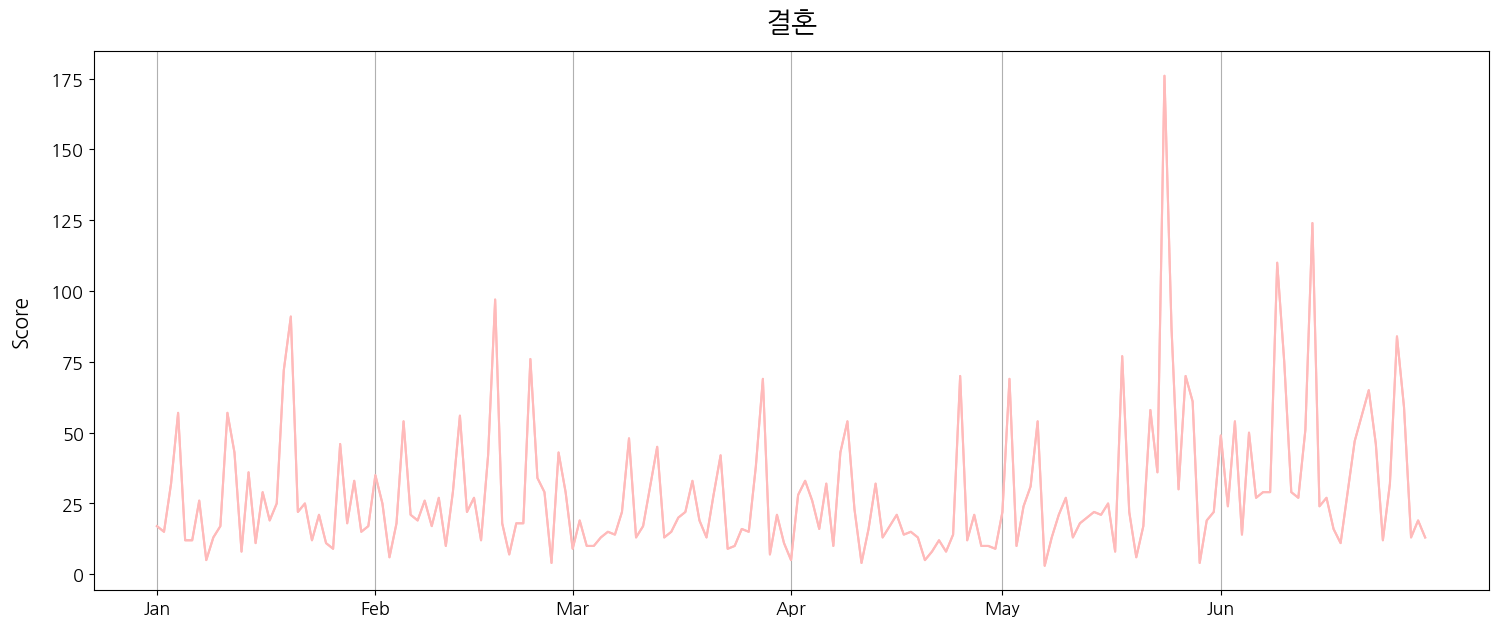

In [18]:
drawing_lineplot(KeywordCount(L_keyword[0]), '결혼', 0)
plt.show()

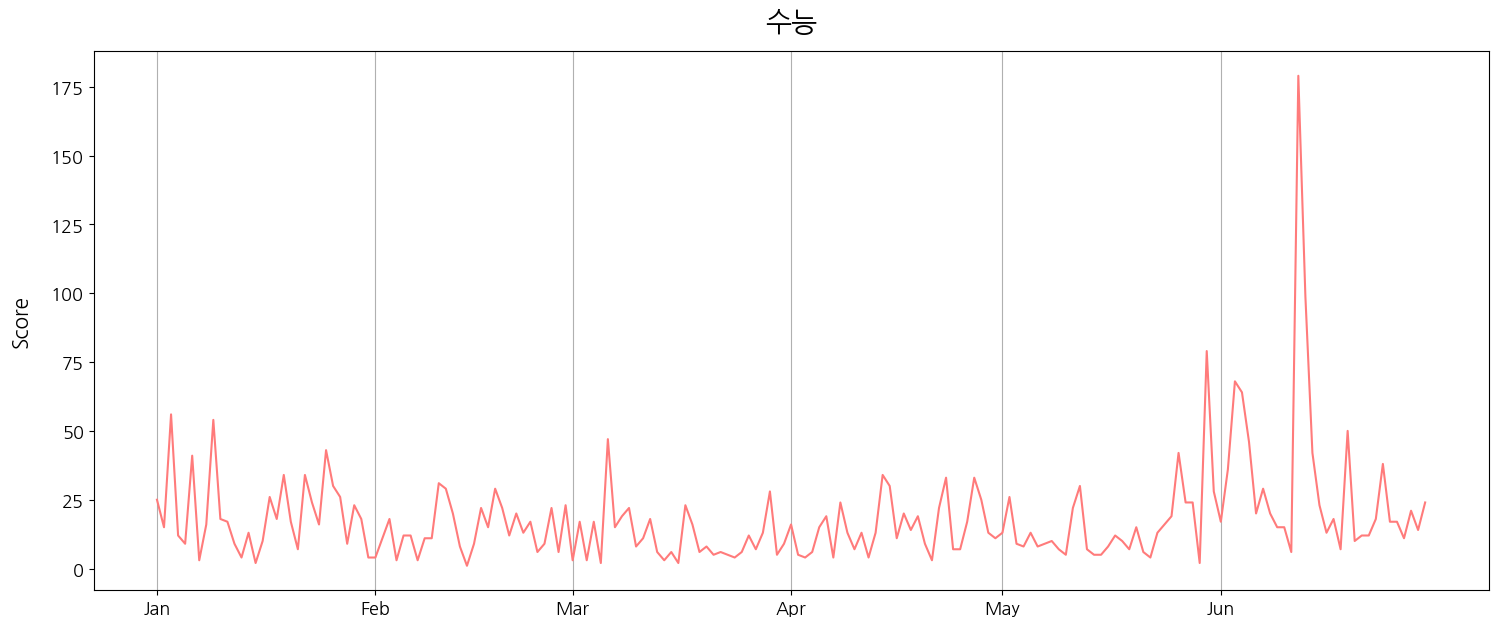

In [20]:
drawing_lineplot(KeywordCount(L_keyword[1]), '수능', 1)
plt.show()

In [19]:
L_keyword

[['결혼', '비혼', '이혼', '출산', '연애', '가치관'],
 ['수능', '국어', '의치', '표점', '확통', '재수'],
 ['메일', '답신', '이메일', '답장', '허가', '정각', '승인', '전송'],
 ['새내기', '학번', '고학', '신입생', '환회', '알때', '후배', '학교생활'],
 ['수강', '강의', '드랍', '과목', '청강'],
 ['휴학', '복학', '학기'],
 ['게임', '갸르', '파이'],
 ['공대', '문과', '이공', '공대생', '대학원'],
 ['확', '진자', '무증상', '폐쇄', '룸메', '락다운', '방역'],
 ['외모', '키도', '성격', '매력', '연애', '이성', '평범', '이상형'],
 ['사건', '손정민'],
 ['프로', '틴', '인치'],
 ['로욜라', '도서관'],
 ['합격', '합격자', '행시'],
 ['중국', '중국인', '일본', '짱깨'],
 ['투표', '선거', '사전투표', '독려', '유권자', '선관위', '재보궐선거', '명부', '인증', '인증샷', '참여자'],
 ['폰', '핸드폰', '아이폰'],
 ['총장', '심종혁', '기풍', '예수회', '공약', '간담', '남양주', '대자보']]